# Assignment 1

## Nama    : Ida Nur Laela
## Program : Python for Data Science
## Batch   : 4/015
Dataset : london_crime_by_lsoa.csv

# Import modules

In [65]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

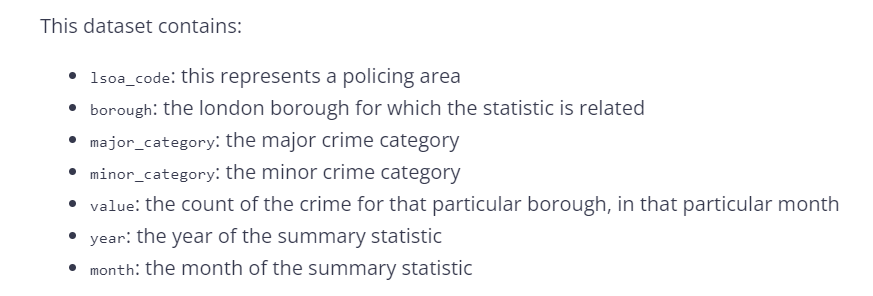

# Read Data

In [66]:
london_crime = pd.read_csv('london_crime_by_lsoa.csv')

In [67]:
# melihat gambaran data pada baris awal
london_crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [68]:
# melihat gambaran data berdasarkan baris akhir
london_crime.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [69]:
# melihat jumlah baris dan kolom

london_crime.shape

(13490604, 7)

In [70]:
# melihat tipe data

london_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [71]:
# melihat list header kolom

london_crime.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [72]:
# melihat list index baris

london_crime.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

# Preprocessing Data

In [73]:
# memeriksa apakah ada objek null

london_crime.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [74]:
# melihat ringkasan singkat 

london_crime.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [75]:
# melihat isi data kolom lsoa_code dan major category 
london_crime[['lsoa_code','major_category']]

,lsoa_code,major_category
0,E01001116,Burglary
1,E01001646,Violence Against the Person
2,E01000677,Violence Against the Person
3,E01003774,Burglary
4,E01004563,Robbery
...,...,...
13490599,E01000504,Criminal Damage
13490600,E01002504,Robbery
13490601,E01004165,Burglary
13490602,E01001134,Robbery


In [76]:
# mengganti kolom major category menjadi area
london_crime.rename(columns={'borough':'area'}, inplace=True )

In [77]:
#  borough menjadi area
london_crime.head()

,lsoa_code,area,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [78]:
# melihat data berdasarkan posisi
print(london_crime.iloc[77])

lsoa_code                     E01001787
area                            Hackney
major_category          Criminal Damage
minor_category    Other Criminal Damage
value                                 0
year                               2011
month                                 7
Name: 77, dtype: object


In [79]:
# analisa kejahatan terbanyak berdasarkan category selama tahun 2008-2016

london_crime_cat = (london_crime.groupby('major_category')['value'].sum()).sort_values(ascending=False)
london_crime_cat

major_category
Theft and Handling             2661861
Violence Against the Person    1558081
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Robbery                         258873
Other Notifiable Offences       106349
Fraud or Forgery                  5325
Sexual Offences                   1273
Name: value, dtype: int64

In [80]:
# analisa kejahatan yang terjadi sejak tahun 2011 sampai 2016

london_crime_cat = london_crime[
            (london_crime['year'] > 2010)
            ].groupby(['major_category','year'])['value'].sum()
london_crime_cat

major_category               year
Burglary                     2011     93315
                             2012     93392
                             2013     87222
                             2014     76053
                             2015     70489
                             2016     68285
Criminal Damage              2011     70914
                             2012     62158
                             2013     56206
                             2014     59279
                             2015     62976
                             2016     64071
Drugs                        2011     57550
                             2012     51776
                             2013     50278
                             2014     44435
                             2015     39785
                             2016     38914
Fraud or Forgery             2011         0
                             2012         0
                             2013         0
                             2014         

In [81]:
# melihat data berdasarkan kondisi yaitu kategori major Theft and Handling
condition = london_crime['major_category']=='Theft and Handling'
print(condition)

0           False
1           False
2           False
3           False
4           False
            ...  
13490599    False
13490600    False
13490601    False
13490602    False
13490603    False
Name: major_category, Length: 13490604, dtype: bool


In [83]:
# menghapus kolom lsoa_code
london_crime.drop(['lsoa_code'], axis=1, inplace=True)

In [84]:
london_crime

,area,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,Croydon,Robbery,Business Property,0,2011,5


# Line Charts

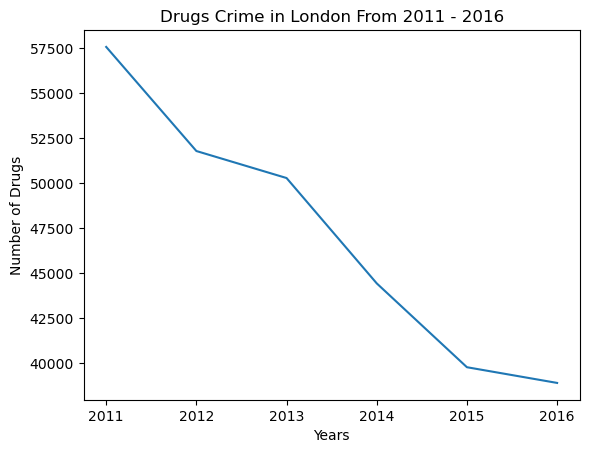

In [96]:
# analisa jumlah kasus criminal damage dari tahun 2011-2016
london_crime_cat['Drugs'].plot(kind='line')

plt.title('Drugs Crime in London From 2011 - 2016')
plt.ylabel('Number of Drugs')
plt.xlabel('Years')

plt.show()

Kesimpulan : Dari line charts diatas menunjukan bahwa kasus drugs yang terjadi di london dari tahun 2011-2016 mengalami penurunan

In [89]:
drugs = london_crime_cat['Drugs']
drugs

year
2011    57550
2012    51776
2013    50278
2014    44435
2015    39785
2016    38914
Name: value, dtype: int64

In [90]:
# melihat jumlah kejahatan drugs terkecil
drugs.min()

38914

In [91]:
# melihat jumlah kejahatan drugs terbesar
drugs.max()

57550

In [92]:
# mengubah menjadi dataframe
crime = drugs.to_frame()
crime

,value
year,
2011,57550
2012,51776
2013,50278
2014,44435
2015,39785
2016,38914


In [93]:
# rename kolom value menjadi drugs
crime = crime.rename(columns={'value': 'Drugs'})
crime

,Drugs
year,
2011,57550
2012,51776
2013,50278
2014,44435
2015,39785
2016,38914


In [94]:
# melihat tahun kejahatan drugs terkecil
year_drugs = crime.reset_index()
year_drugs['year'].min()

2011

In [95]:
# melihat tahun kejahatan drugs terbesar
year_drugs = crime.reset_index()
year_drugs['year'].max()

2016

In [265]:
# analisa kejahatan yang terjadi sejak tahun 2011 sampai 2016

lc = london_crime[
            (london_crime['year'] > 2007)
            ].groupby(['major_category','year'])['value'].sum()
lc

major_category               year
Burglary                     2008     88092
                             2009     90619
                             2010     86826
                             2011     93315
                             2012     93392
                                      ...  
Violence Against the Person  2012    150014
                             2013    146181
                             2014    185349
                             2015    218740
                             2016    232381
Name: value, Length: 81, dtype: int64

In [130]:
london_crime

,area,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,Croydon,Robbery,Business Property,0,2011,5


In [131]:
# melihat area greenwich
gw = london_crime[(london_crime['area']=='Greenwich')]
gw

,area,major_category,minor_category,value,year,month
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
75,Greenwich,Burglary,Burglary in Other Buildings,0,2016,11
100,Greenwich,Drugs,Possession Of Drugs,0,2012,10
221,Greenwich,Criminal Damage,Criminal Damage To Motor Vehicle,0,2008,2
248,Greenwich,Theft and Handling,Motor Vehicle Interference & Tampering,0,2009,2
...,...,...,...,...,...,...
13490518,Greenwich,Drugs,Possession Of Drugs,0,2014,11
13490546,Greenwich,Criminal Damage,Criminal Damage To Dwelling,0,2013,1
13490572,Greenwich,Criminal Damage,Criminal Damage To Motor Vehicle,1,2013,8
13490590,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4


In [132]:
# melihat area greenwich kategori kejahatan major lebih dari tahun 2007
greenwich = gw[(gw['year'] > 2007)].groupby(['major_category','year'])['value'].sum()
greenwich

major_category               year
Burglary                     2008    3008
                             2009    2701
                             2010    2494
                             2011    2300
                             2012    2305
                                     ... 
Violence Against the Person  2012    5310
                             2013    5078
                             2014    6444
                             2015    7756
                             2016    8590
Name: value, Length: 81, dtype: int64

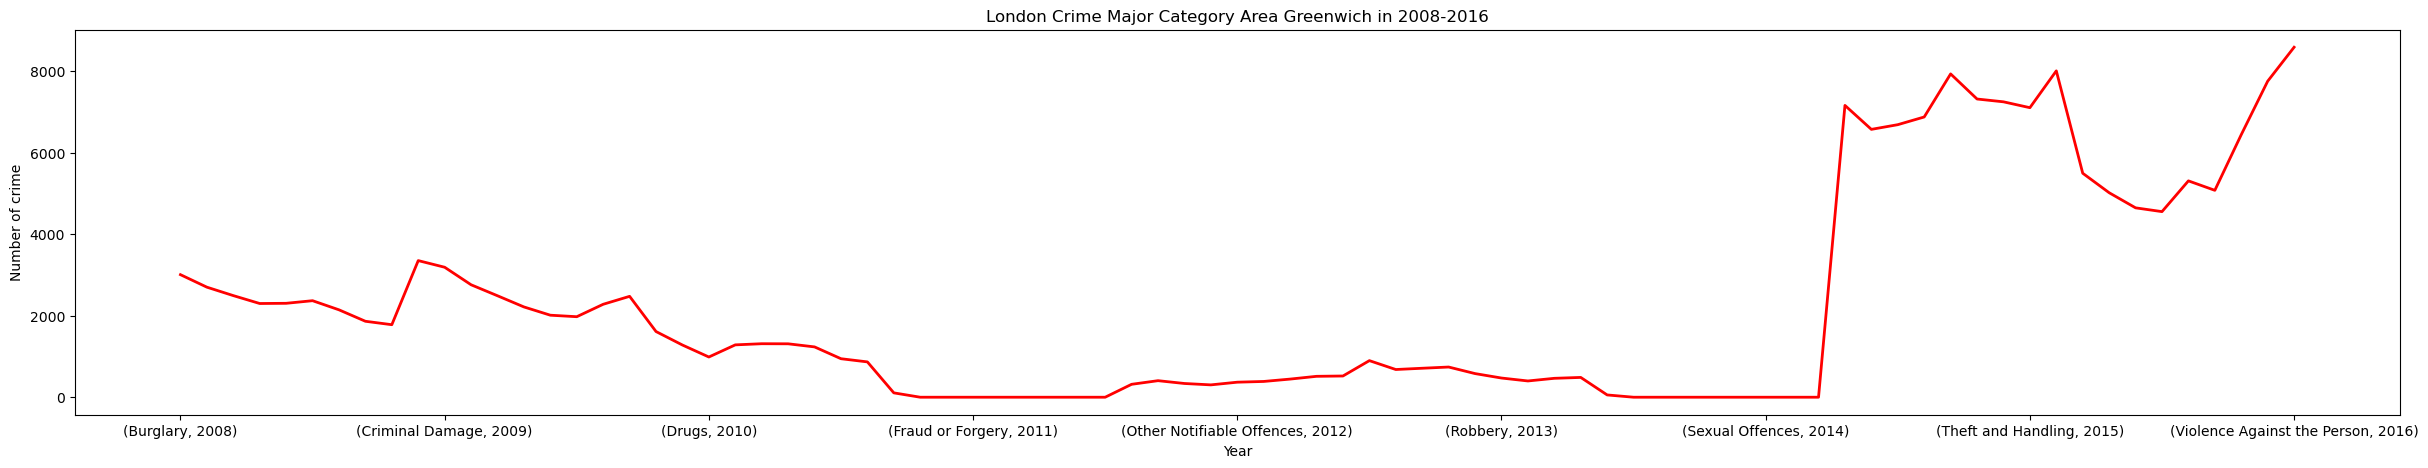

In [135]:
# lineplot major_category greenwich
greenwich.plot(kind='line', figsize=(30,5), color='red', linewidth='2')
plt.xlabel('Year')
plt.ylabel('Number of crime')
plt.title('London Crime Major Category Area Greenwich in 2008-2016')
plt.show()

Kesimpulan : Dari line chart diatas menunjukan bahwa kasus yang terbanyak yang terjadi pada rentang waktu 2008-2016 adalah theft and handling dan kasus violance against the person

In [124]:
# melihat jumlah kasus criminal damage
theft_hand = london_crime_cat['Theft and Handling']
theft_hand

year
2011    309292
2012    334054
2013    306372
2014    279880
2015    284022
2016    294133
Name: value, dtype: int64

In [125]:
# membuat dataframe criminal damage
th =theft_hand.to_frame()
th

,value
year,
2011,309292
2012,334054
2013,306372
2014,279880
2015,284022
2016,294133


In [126]:
# mengubah nama kolom menjadi theft and handling
th = th.rename(columns={'value':'Theft and Handling'})
th

,Theft and Handling
year,
2011,309292
2012,334054
2013,306372
2014,279880
2015,284022
2016,294133


In [127]:
# menggabungkan drugs dan theft dan handling
both = pd.concat([crime, th], axis=1)
both

,Drugs,Theft and Handling
year,,
2011,57550,309292
2012,51776,334054
2013,50278,306372
2014,44435,279880
2015,39785,284022
2016,38914,294133


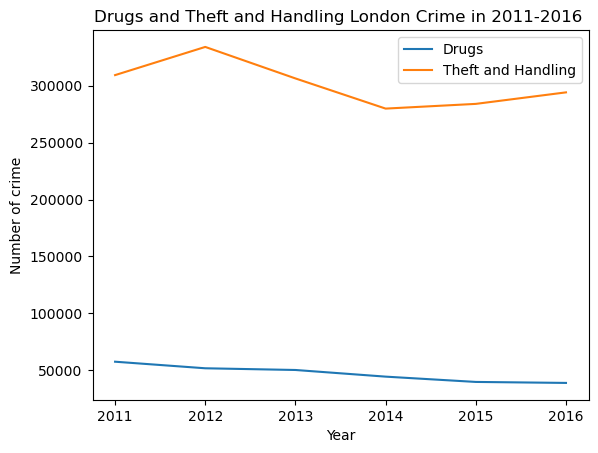

In [129]:
# line plot gabungan drugs dan theft dan handling
both.plot()
plt.xlabel('Year')
plt.ylabel('Number of crime')
plt.title('Drugs and Theft and Handling London Crime in 2011-2016 ')
plt.show()

Kesimpulan : Dari line chart diatas menunjukan bahwa kasus yang terbanyak yang terjadi pada rentang waktu 2011-2016 adalah theft and handling dan kasus violance against the person

# Bar Plots

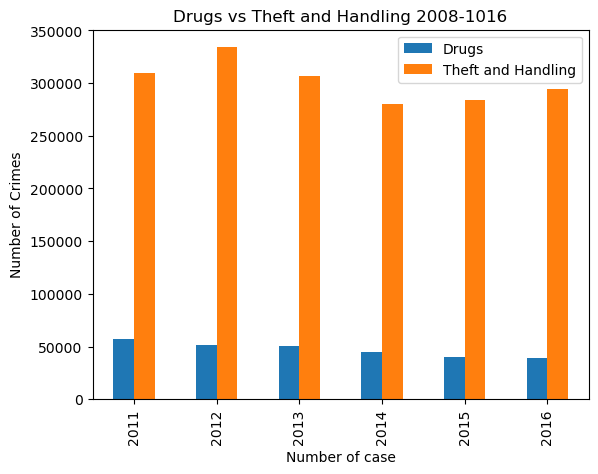

In [168]:
# analisa jumlah kasus drugs vs theft and handling in 2016
both.plot(kind='bar')
plt.title('Drugs vs Theft and Handling 2008-1016')
plt.ylabel('Number of Crimes')
plt.xlabel('Number of case')
plt.show()

Kesimpulan : Dari bar char diatas menunjukan bahwa kasus yang terbanyak adalah theft and handling dan kasus drugs merupakan kasus yang sedikit

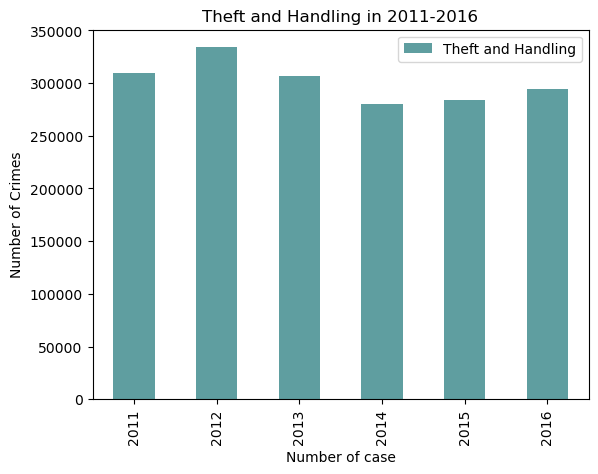

In [229]:
th.plot(kind='bar', color='cadetblue')
plt.title('Theft and Handling in 2011-2016')
plt.ylabel('Number of Crimes')
plt.xlabel('Number of case')
plt.show()

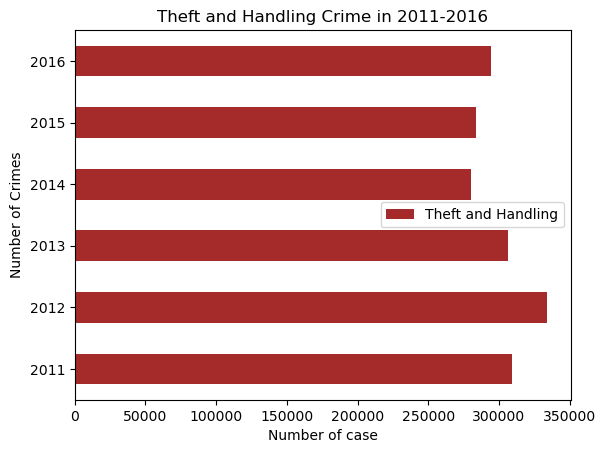

In [233]:
# merubah bar vertikal menjadi horizontal
th.plot(kind='barh', color='brown')
plt.title('Theft and Handling Crime in 2011-2016')
plt.ylabel('Number of Crimes')
plt.xlabel('Number of case')
plt.show()

Kesimpulan : Kasus theft and handling terbanyak terjadi pada tahun 2012 dengan jumlah hampir mencapai 35000

In [179]:
burglary = london_crime_cat['Burglary']
burglary

year
2011    93315
2012    93392
2013    87222
2014    76053
2015    70489
2016    68285
Name: value, dtype: int64

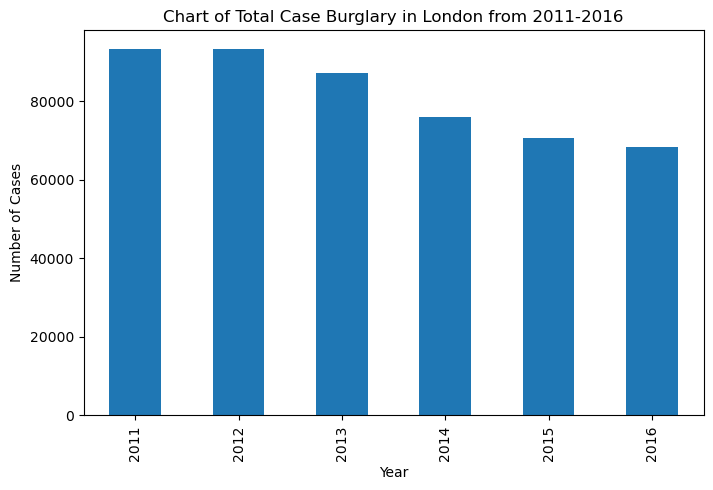

In [180]:
# analisa jumlah kasus burglary dari tahun 2011-2016

london_crime_cat['Burglary'].plot(kind='bar', figsize=(8, 5))

plt.title('Chart of Total Case Burglary in London from 2011-2016') # add a title to the histogram
plt.ylabel('Number of Cases') # add y-label
plt.xlabel('Year') # add x-label

plt.show()

 Kesimpulan : Kasus Burglary di London mengalami penurunan dimulai sejak tahun 2013

In [181]:
# membuat frame

bg = burglary.to_frame()
bg

,value
year,
2011,93315
2012,93392
2013,87222
2014,76053
2015,70489
2016,68285


In [184]:
# rename kolom
bg_case = bg.rename(columns={'value': 'Burglary'})
bg_case

,Burglary
year,
2011,93315
2012,93392
2013,87222
2014,76053
2015,70489
2016,68285


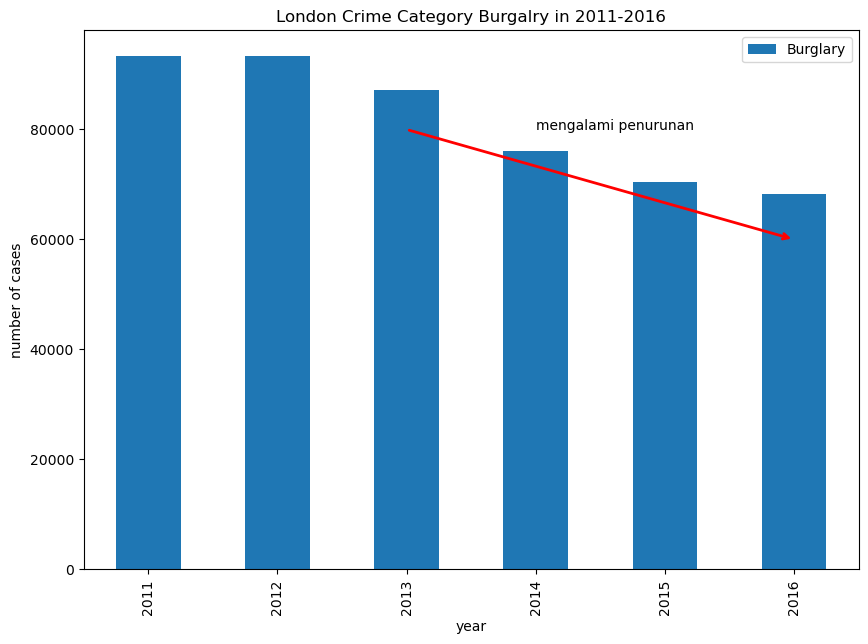

In [266]:
bg_case.plot(kind='bar',figsize=(10,7))
plt.title('London Crime Category Burgalry in 2011-2016')
plt.ylabel('number of cases')
plt.xlabel('year')

plt.annotate('',xy=(2,80000), xytext=(5,60000), arrowprops=dict(arrowstyle='<-', connectionstyle='arc3', color='red', lw=2))

plt.annotate('mengalami penurunan', xy=(3,80000))
plt.show()

Keterangan : Dari hasil bar chart diatas menunjukan kasus kategori burglary pada rentang waktu 2011 - 2016 mengalami penurunan di empat tahun terakhir

In [238]:
# analisa area/wilayah berdasarkan jumlah kasus di tahun 2016

wilayah = (london_crime[
            (london_crime['year'] == 2016)
            ].groupby('area')['value'].sum()).sort_values(ascending=False)
wilayah

area
Westminster               48330
Lambeth                   34071
Southwark                 31636
Newham                    30090
Tower Hamlets             29253
Camden                    29183
Croydon                   28712
Hackney                   28265
Haringey                  27174
Ealing                    27127
Islington                 27092
Brent                     26693
Barnet                    24684
Hillingdon                24341
Lewisham                  23904
Wandsworth                23679
Greenwich                 22730
Enfield                   22485
Hounslow                  22251
Waltham Forest            20716
Hammersmith and Fulham    20174
Bromley                   20164
Kensington and Chelsea    19580
Redbridge                 19502
Havering                  16903
Barking and Dagenham      16741
Harrow                    13153
Bexley                    12840
Merton                    12755
Richmond upon Thames      11074
Sutton                    10658
Kin

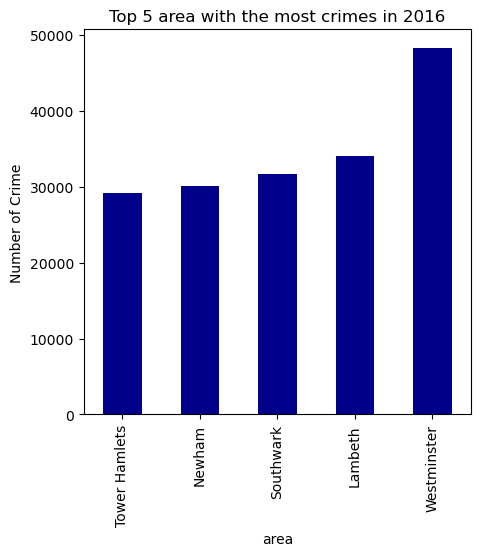

In [245]:
# 5 wilayah teratas berdasar jumlah kasus terbanyak di tahun 2016

top5 = (wilayah.head(5)).sort_values()
top5.plot(kind='bar', figsize=(5, 5), color='darkblue')
plt.xlabel('area')
plt.ylabel('Number of Crime')
plt.title('Top 5 area with the most crimes in 2016')
plt.show()

Kesimpulan : Dari bar charts diatas area westhminster menjadi area dengan kasus terbanyak

# Pie Diagrams

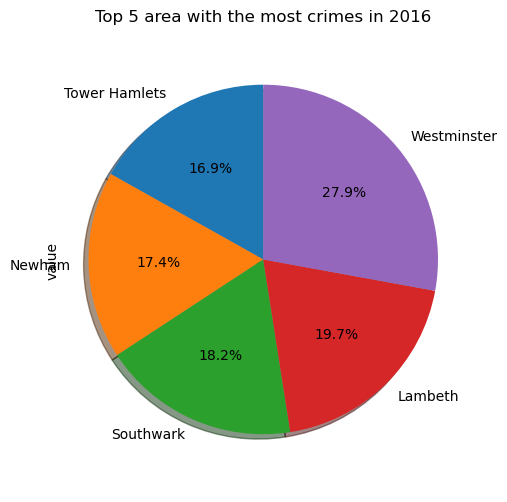

In [240]:
# pie chart = menggambarkan proporsi dari data
top5.plot(kind='pie',figsize=(5,6),autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Top 5 area with the most crimes in 2016')
plt.axis('equal')
plt.show()

In [147]:
# melihat Kejahatan yang terjadi sejak tahun 2011

london_crime_cat_2011 = london_crime[
            (london_crime['year'] == 2011)
            ].groupby('major_category')['value'].sum()
london_crime_cat_2011

major_category
Burglary                        93315
Criminal Damage                 70914
Drugs                           57550
Fraud or Forgery                    0
Other Notifiable Offences       10264
Robbery                         36679
Sexual Offences                     0
Theft and Handling             309292
Violence Against the Person    146901
Name: value, dtype: int64

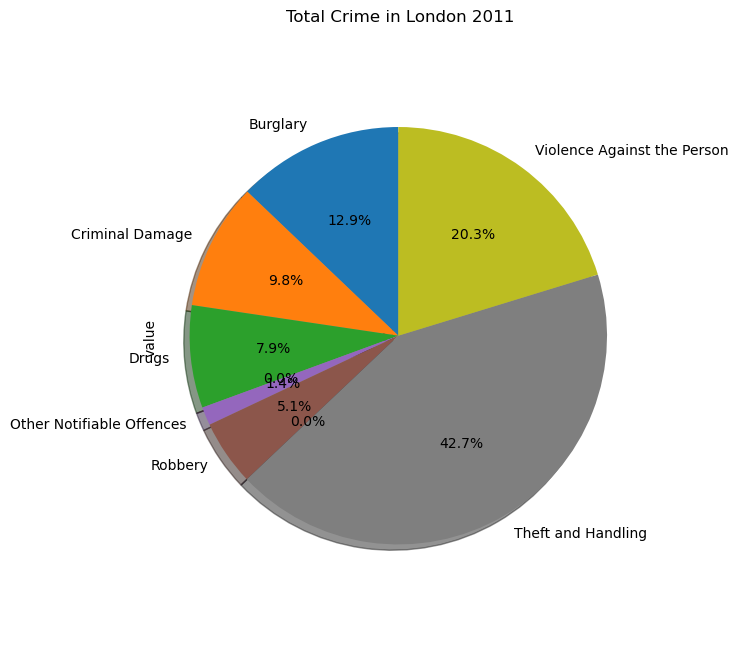

In [150]:
# analisa persebaran kasus di tahun 2011

london_crime_cat_2011.plot(kind='pie',figsize=(6, 8),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Total Crime in London 2011')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

Kesimpulan : Kasus yang terjadi yangg paling banyak pada tahun 2011 adalah theft and handling crime.

In [154]:
london_crime

,area,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,Croydon,Robbery,Business Property,0,2011,5


## Area Plots

In [241]:
# analisa area/wilayah berdasarkan jumlah kasus di tahun 2016

wilayah = (london_crime[
            (london_crime['year'] == 2016)
            ].groupby('area')['value'].sum()).sort_values(ascending=False)
wilayah

area
Westminster               48330
Lambeth                   34071
Southwark                 31636
Newham                    30090
Tower Hamlets             29253
Camden                    29183
Croydon                   28712
Hackney                   28265
Haringey                  27174
Ealing                    27127
Islington                 27092
Brent                     26693
Barnet                    24684
Hillingdon                24341
Lewisham                  23904
Wandsworth                23679
Greenwich                 22730
Enfield                   22485
Hounslow                  22251
Waltham Forest            20716
Hammersmith and Fulham    20174
Bromley                   20164
Kensington and Chelsea    19580
Redbridge                 19502
Havering                  16903
Barking and Dagenham      16741
Harrow                    13153
Bexley                    12840
Merton                    12755
Richmond upon Thames      11074
Sutton                    10658
Kin

In [24]:
print(plt.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


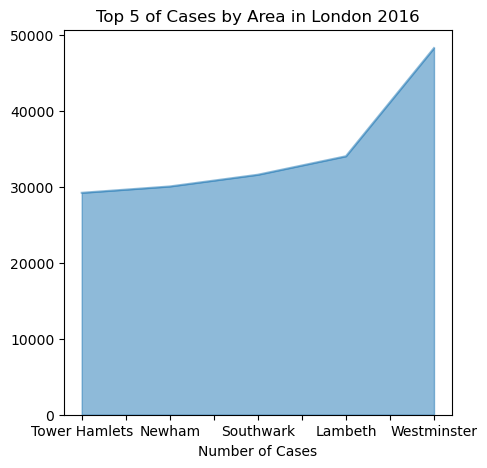

In [243]:
# Analisa Top 5 Wilayah berdasarkan jumlah kasus di tahun 2016

wilayah_top5 = (wilayah.head(5)).sort_values(ascending=True)
wilayah_top5.plot(kind='area', stacked=False, figsize=(5, 5))
plt.xlabel('Number of Cases')
plt.title('Top 5 of Cases by Area in London 2016')
plt.show()

In [160]:
drugs

year
2011    57550
2012    51776
2013    50278
2014    44435
2015    39785
2016    38914
Name: value, dtype: int64

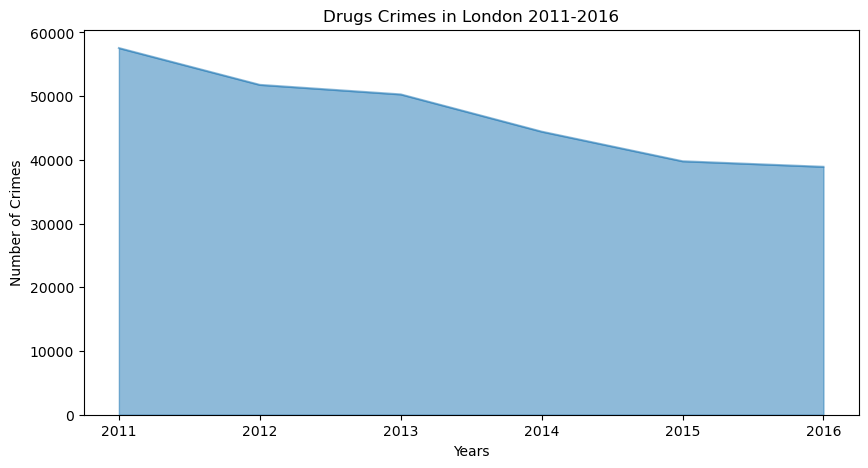

In [244]:
# area plots scripting layer
# stacked  = menentukan bar/plot pada grafik di-stacked (ditumpuk) atau tidak
# alpha = mengatur tingkat transparansi

drugs.plot(kind='area',alpha=0.5,stacked=True,figsize=(10,5))
plt.title('Drugs Crimes in London 2011-2016')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')
plt.show()

In [161]:
greenwich

major_category               year
Burglary                     2008    3008
                             2009    2701
                             2010    2494
                             2011    2300
                             2012    2305
                                     ... 
Violence Against the Person  2012    5310
                             2013    5078
                             2014    6444
                             2015    7756
                             2016    8590
Name: value, Length: 81, dtype: int64

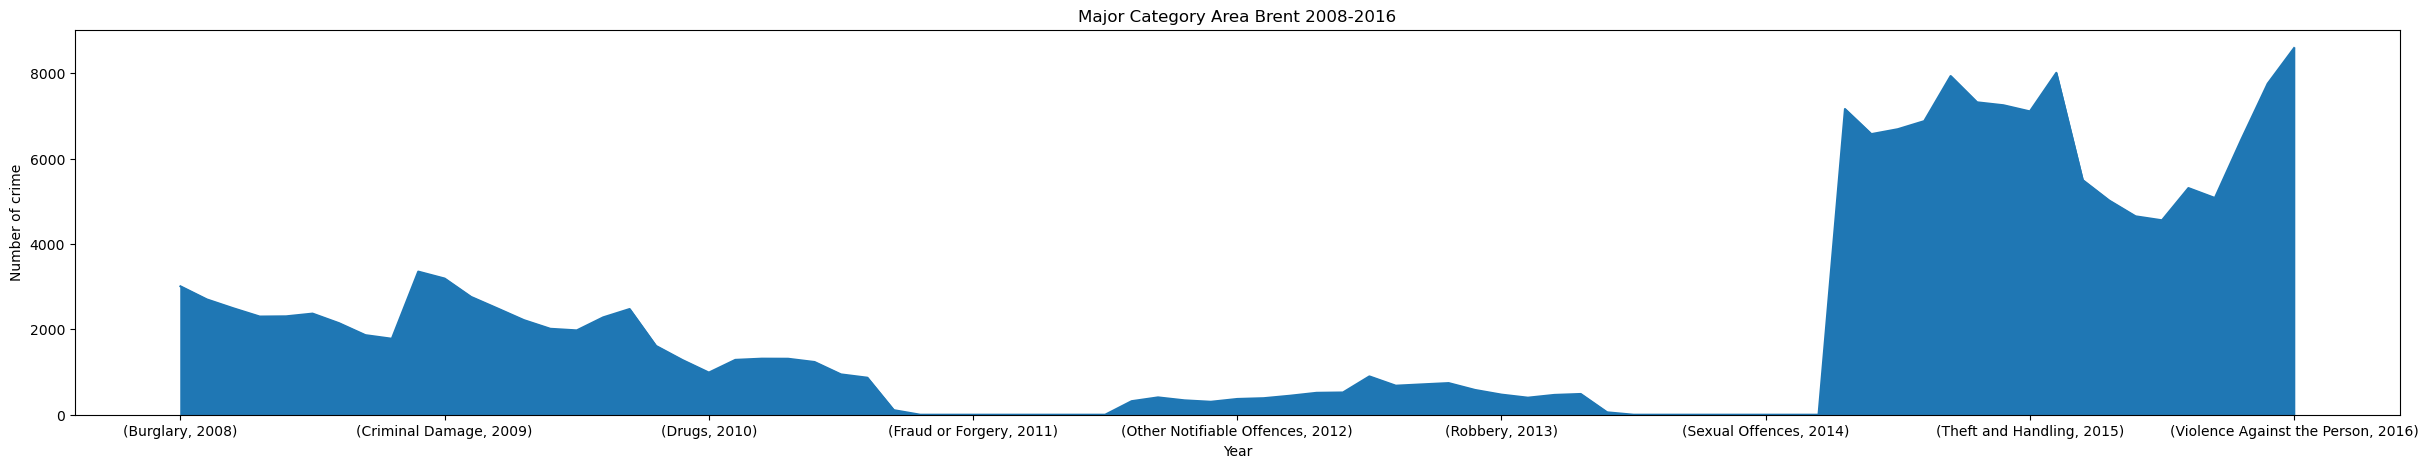

In [163]:
# area plot greenwich 2008-2016
greenwich.plot(kind='area', figsize=(30,5))
plt.xlabel('Year')
plt.ylabel('Number of crime')
plt.title('Major Category Area Brent 2008-2016')
plt.show()

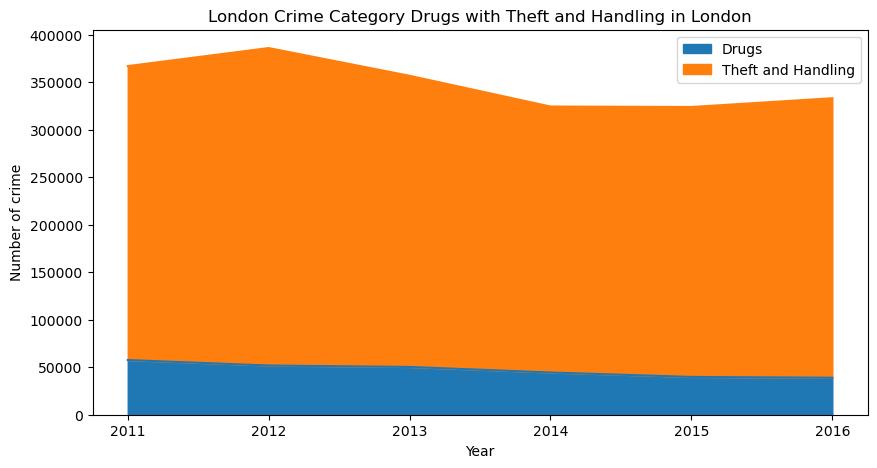

In [165]:
# area plot gabungan wounding dan Assault With Injury
both.plot(kind='area', figsize=(10,5))
plt.xlabel('Year')
plt.ylabel('Number of crime')
plt.title('London Crime Category Drugs with Theft and Handling in London')
plt.show()

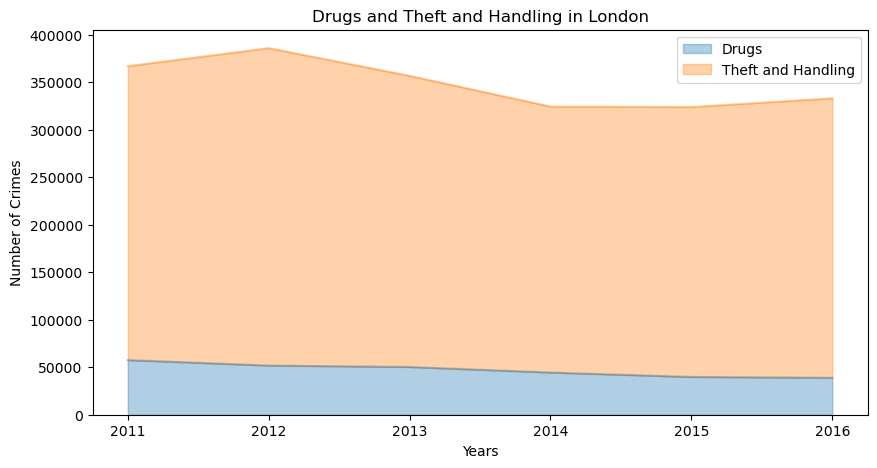

In [248]:
# area plot artist layer
ax = both.plot(kind='area',alpha=0.35,figsize=(10,5))
ax.set_title("Drugs and Theft and Handling in London")
ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Years')
plt.show()

## Histogram

In [249]:
# menggabungkan wounding dan AssaultwithInjury
two = pd.concat([th, bg_case], axis=1)
two

,Theft and Handling,Burglary
year,,
2011,309292,93315
2012,334054,93392
2013,306372,87222
2014,279880,76053
2015,284022,70489
2016,294133,68285


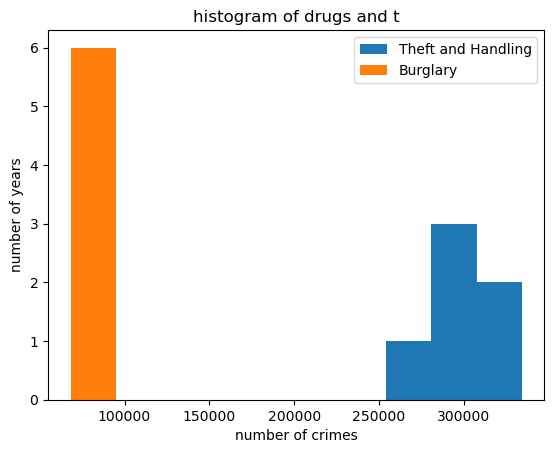

In [250]:
two.plot(kind='hist')
plt.title("histogram of drugs and t")
plt.ylabel('number of years')
plt.xlabel('number of crimes')
plt.show()

## Box plot

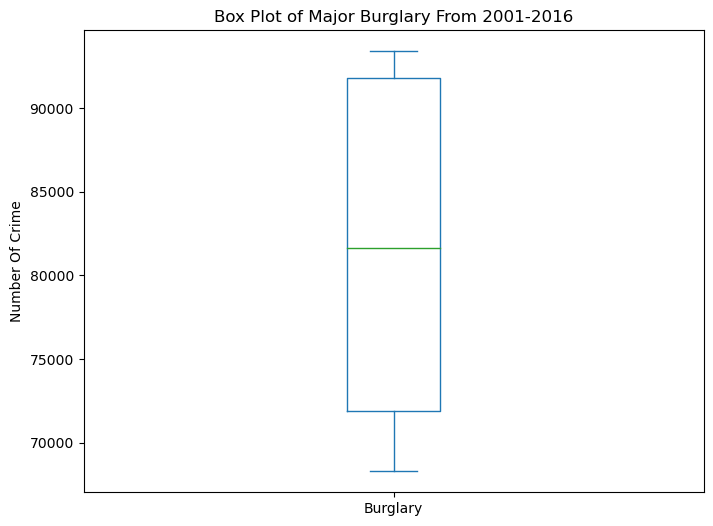

In [252]:
bg_case.plot(kind='box', figsize=(8,6))
plt.title('Box Plot of Major Burglary From 2001-2016')
plt.ylabel('Number Of Crime')
plt.show()

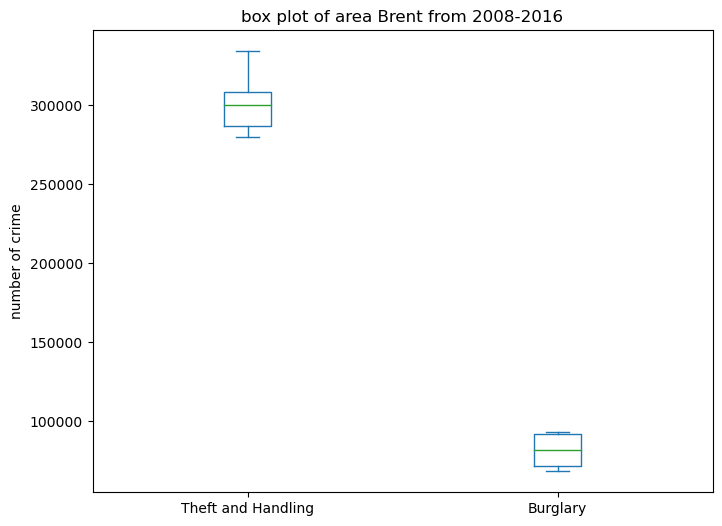

In [255]:
two.plot(kind='box', figsize=(8,6))
plt.title('box plot of area Brent from 2008-2016')
plt.ylabel('number of crime')
plt.show()

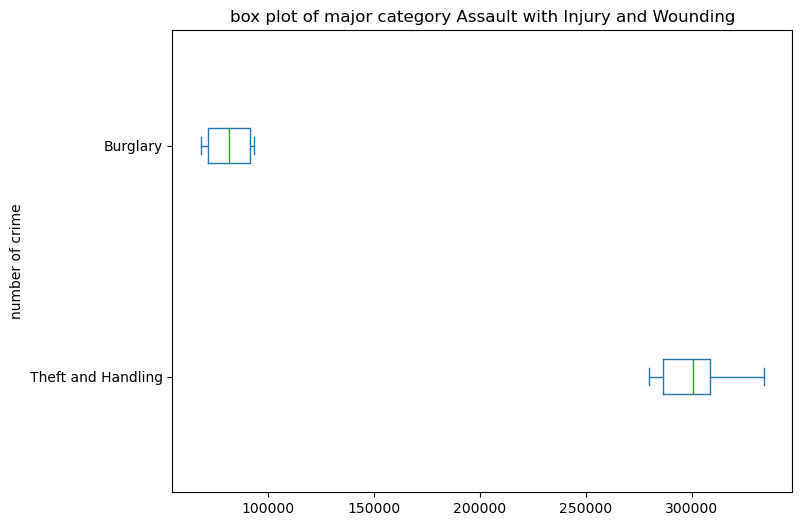

In [256]:
two.plot(kind='box', figsize=(8,6), vert=False)
plt.title('box plot of major category Assault with Injury and Wounding')
plt.ylabel('number of crime')
plt.show()

## Scatter Plot

In [259]:
lc

major_category               year
Burglary                     2008     88092
                             2009     90619
                             2010     86826
                             2011     93315
                             2012     93392
                                      ...  
Violence Against the Person  2012    150014
                             2013    146181
                             2014    185349
                             2015    218740
                             2016    232381
Name: value, Length: 81, dtype: int64

In [270]:
vap = lc['Violence Against the Person']
vap

year
2008    159844
2009    160777
2010    157894
2011    146901
2012    150014
2013    146181
2014    185349
2015    218740
2016    232381
Name: value, dtype: int64

In [279]:
# mengubah menjadi data frame
violance = vap.to_frame()
violance

,value
year,
2008,159844
2009,160777
2010,157894
2011,146901
2012,150014
2013,146181
2014,185349
2015,218740
2016,232381


In [281]:
vio = violance = violance.rename(columns={'value':'total'})
vio

,total
year,
2008,159844
2009,160777
2010,157894
2011,146901
2012,150014
2013,146181
2014,185349
2015,218740
2016,232381


In [282]:
violance = vio.reset_index()
violance

,year,total
0,2008,159844
1,2009,160777
2,2010,157894
3,2011,146901
4,2012,150014
5,2013,146181
6,2014,185349
7,2015,218740
8,2016,232381


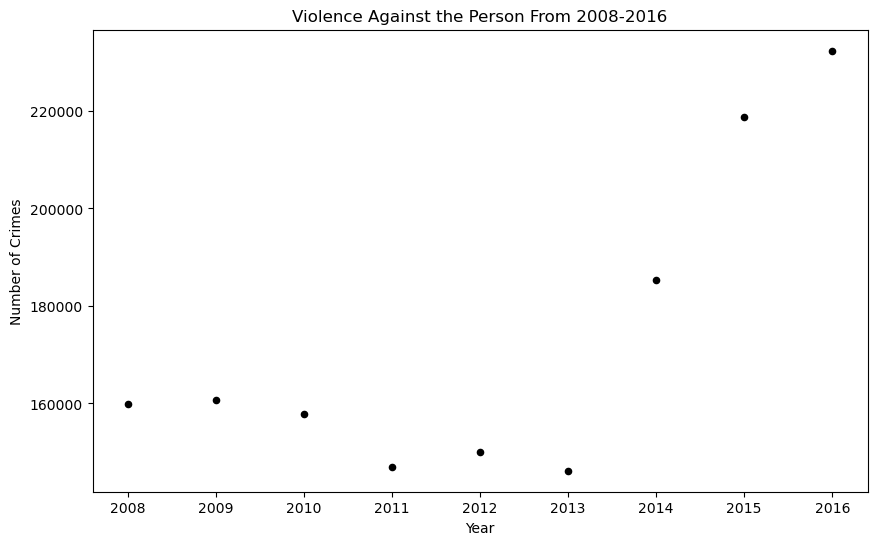

In [285]:
violance.plot(kind='scatter', x='year', y='total', figsize=(10,6),color='black')
plt.title('Violence Against the Person From 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

In [286]:
two

,Theft and Handling,Burglary
year,,
2011,309292,93315
2012,334054,93392
2013,306372,87222
2014,279880,76053
2015,284022,70489
2016,294133,68285


In [287]:
two.reset_index(inplace=True)
two

,year,Theft and Handling,Burglary
0,2011,309292,93315
1,2012,334054,93392
2,2013,306372,87222
3,2014,279880,76053
4,2015,284022,70489
5,2016,294133,68285


In [290]:
t = (two['Theft and Handling']-two['Theft and Handling'].min()) / (two['Theft and Handling'].max() - two['Theft and Handling'].min())

b = (two['Burglary']-two['Burglary'].min()) / (two['Burglary'].max() - two['Burglary'].min())

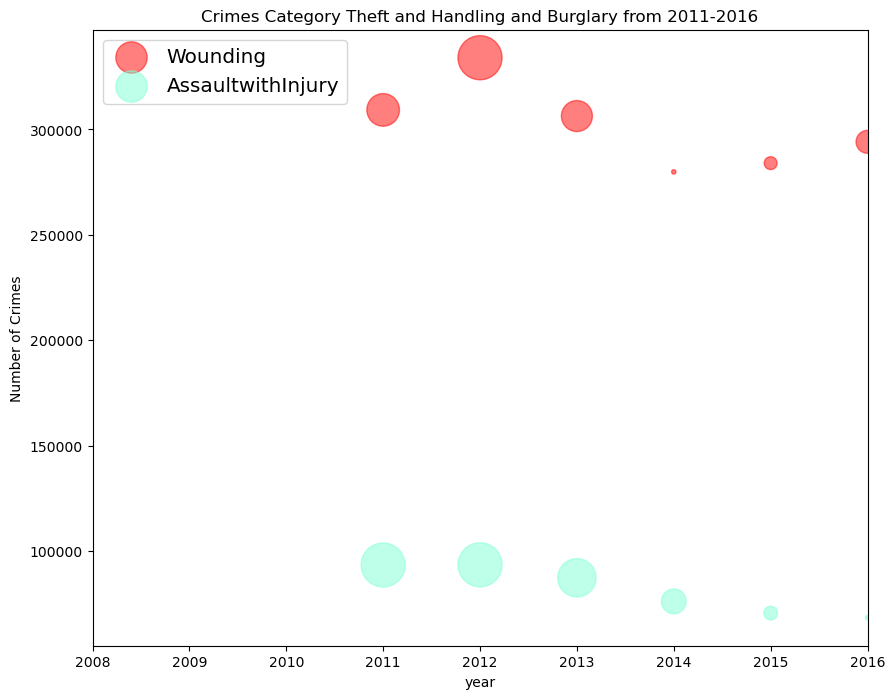

In [294]:
x0 =  two.plot(kind='scatter', x='year', y='Theft and Handling', figsize=(10, 8), alpha=0.5, color="red", s=t* 1000 +10, xlim=(2008,2016))

x1 =  two.plot(kind='scatter', x='year', y='Burglary', alpha=0.5, color="aquamarine", s=b * 1000 +10, ax = x0)

x0.set_ylabel('Number of Crimes')
x0.set_title('Crimes Category Theft and Handling and Burglary from 2011-2016')
x0.legend(['Wounding','AssaultwithInjury'], 
loc='upper left', fontsize='x-large')

## Word Clouds

In [296]:
!pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp39-cp39-win_amd64.whl (153 kB)


In [336]:
# import wordclouds library
from wordcloud import WordCloud, STOPWORDS

In [337]:
words = list(london_crime['area'])
words

['Croydon',
 'Greenwich',
 'Bromley',
 'Redbridge',
 'Wandsworth',
 'Ealing',
 'Ealing',
 'Hounslow',
 'Newham',
 'Sutton',
 'Haringey',
 'Lambeth',
 'Richmond upon Thames',
 'Wandsworth',
 'Hillingdon',
 'Havering',
 'Barking and Dagenham',
 'Redbridge',
 'Kingston upon Thames',
 'Sutton',
 'Redbridge',
 'Westminster',
 'Hackney',
 'Enfield',
 'Ealing',
 'Hackney',
 'Harrow',
 'Ealing',
 'Haringey',
 'Lewisham',
 'Ealing',
 'Hounslow',
 'Bromley',
 'Havering',
 'Hillingdon',
 'Brent',
 'Haringey',
 'Hounslow',
 'Lambeth',
 'Southwark',
 'Havering',
 'Newham',
 'Croydon',
 'Croydon',
 'Barnet',
 'Waltham Forest',
 'Westminster',
 'Lambeth',
 'Lewisham',
 'Bromley',
 'Ealing',
 'Brent',
 'Haringey',
 'Camden',
 'Bexley',
 'Croydon',
 'Lewisham',
 'Hounslow',
 'Camden',
 'Kensington and Chelsea',
 'Hounslow',
 'Lewisham',
 'Kingston upon Thames',
 'Brent',
 'Southwark',
 'Harrow',
 'Bromley',
 'Lambeth',
 'Waltham Forest',
 'Islington',
 'Southwark',
 'Newham',
 'Barnet',
 'Brent',
 'Wes

In [338]:
text = ' '.join(london_crime['area'].astype(str).tolist())

In [339]:
london_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   area            object
 1   major_category  object
 2   minor_category  object
 3   value           int64 
 4   year            int64 
 5   month           int64 
dtypes: int64(3), object(3)
memory usage: 617.6+ MB


In [340]:
wc = WordCloud(width=800, height=800, background_color='white', 
               min_font_size=10).generate(text)

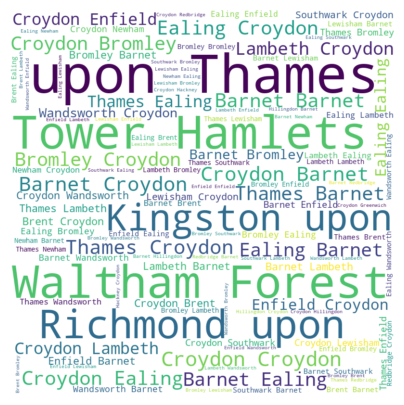

In [341]:
fig=plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [342]:
from PIL import Image

In [320]:
stopwords = set(STOPWORDS)

In [411]:
alice = np.array(Image.open('mobil.png'))
alice

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]]

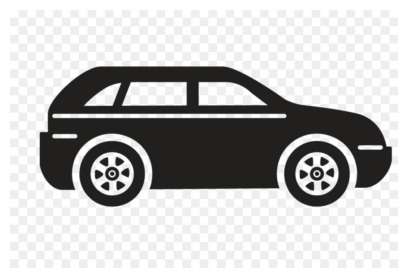

In [412]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)
plt.imshow(alice, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

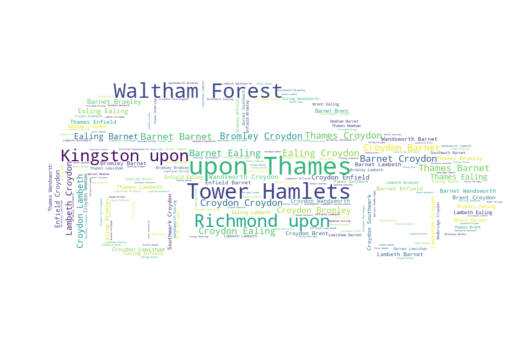

In [413]:
wc = WordCloud(width=900, height=900, background_color='white', 
               mask=alice, stopwords=stopwords)
wc.generate(text)
fig=plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Folium Maps

In [345]:
!pip install seaborn
import seaborn as sns
!pip install folium
import folium

  Using cached folium-0.14.0-py2.py3-none-any.whl (102 kB)
  Using cached branca-0.6.0-py3-none-any.whl (24 kB)


In [396]:
# london lat and lon
latitude= 51.5073509 #garis lintang
longitude= -0.1277583 #garis bujur

In [395]:
london = folium.Map(location=[latitude,longitude],zoom_start=13)
london

In [390]:
# mengganti tipe peta
type_london = folium.Map(location=[51.5085300,-0.1257400],zoom_start=13, tiles='Stamen Toner')
type_london

In [376]:
london_crime.head()

,area,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


In [423]:
croydon_map = folium.Map(location=[lat, long], zoom_start=12)
croydon_map

In [417]:
country = {
    'area': ['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth'],
    'latitude': [ 51.376495, 51.477928 ,51.367332, 51.574818, 51.457072   ],
    'longitude': [-0.100594, -0.001545,  -0.001619, 0.050754, -0.181782  ]
}

df_country = pd.DataFrame(country)
df_country

,area,latitude,longitude
0,Croydon,51.376495,-0.100594
1,Greenwich,51.477928,-0.001545
2,Bromley,51.367332,-0.001619
3,Redbridge,51.574818,0.050754
4,Wandsworth,51.457072,-0.181782


In [421]:
crime_area = folium.map.FeatureGroup()

for lat, lng, in zip(df_country.latitude, df_country.longitude):
    crime_area.add_child(
        folium.CircleMarker(
           location= [lat, lng],
           radius=5,
           color='yellow',
           fill=True,
           fill_color='blue',
           fill_opacity=0.6
        )  
    )
london.add_child(crime_area) 

In [426]:
# London latitude and longitude values
latitude = 54.237933
longitude = -2.36967

In [429]:
world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' # geojson file

# create a plain world map
london_map = folium.Map(location=[54.237933, -2.36967], zoom_start=2)

# generate choropleth map using london crime by lsoa
london_map.choropleth(
    geo_data=world_geo,
    data=london_crime,
    columns=['area', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', #Yellow, Orange, Red
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime rate in boroughs of london'
)

# display map
london_map

Peta tersebut menggambarkan sebaran tingkat kejahatan di berbagai wilayah di london. Dengan keterangan warna merah merupakan tingkat kejahatan yang paling tinggi seperti wilayah Sutton, Streatham, Brixton, dan Hackner. Sedangkan warna kuning merupakan tingkat kejahatan yang paling rendah yang hampir meliputi semua wilayah di London.